In [1]:
!pip install tensorflow==1.14.0
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 43 kB/s 
     |████████████████████████████████| 488 kB 64.4 MB/s 
     |████████████████████████████████| 3.1 MB 26.2 MB/s 
     |████████████████████████████████| 50 kB 4.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

# Steps

1. Load npy data
2. Visualize the data

In [2]:
# Loading CIFAR datasets from the npy files
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import os

from google.colab import drive
drive.mount('/content/gdrive')


class ShallowCNet():
    @staticmethod
    def build(width, height, depth, classes,weights_path=None):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        #model = Sequential()
        inputShape = (width, height, depth)

        # first CONV => RELU
        In_ = Input(inputShape)
        b1 = BatchNormalization(axis=-1)(In_)
        c1 = Conv2D(32, (3, 3), padding="same", input_shape=inputShape)(b1)
        a1 = Activation("relu")(c1)

        # first CONV => RELU => POOL
        b2 = BatchNormalization(axis=-1)(a1)
        c2 = Conv2D(32, (3, 3), padding="same")(b2)
        a2 = Activation("relu")(c2)
        p1 = MaxPooling2D(pool_size=(2, 2))(a2)

        # first (and only) set of FC => RELU => Dropout layers
        d1 = Flatten()(p1)
        d2 = Dense(512)(d1)
        d3 = Activation("relu")(d2)
        d4 = Dropout(0.5)(d3)

        # softmax classifier
        output = Dense(classes, activation='softmax')(d4)
        model = Model(inputs=In_,outputs=output)

        if weights_path:
            model.load_weights(weights_path)

        return model

train_data = np.load(r"/content/gdrive/MyDrive/Colab Notebooks/cifar_npy/ret_cifar_train.npz")

Xtrain = train_data["arr_0"]
ytrain = train_data["arr_1"]

#print(Xtrain.shape, ytrain.shape)

test_data = np.load(r"/content/gdrive/MyDrive/Colab Notebooks/cifar_npy/ret_cifar_test.npz")

Xtest = test_data["arr_0"]
ytest = test_data["arr_1"]

#print(Xtest.shape, ytest.shape)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Mounted at /content/gdrive


In [3]:
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


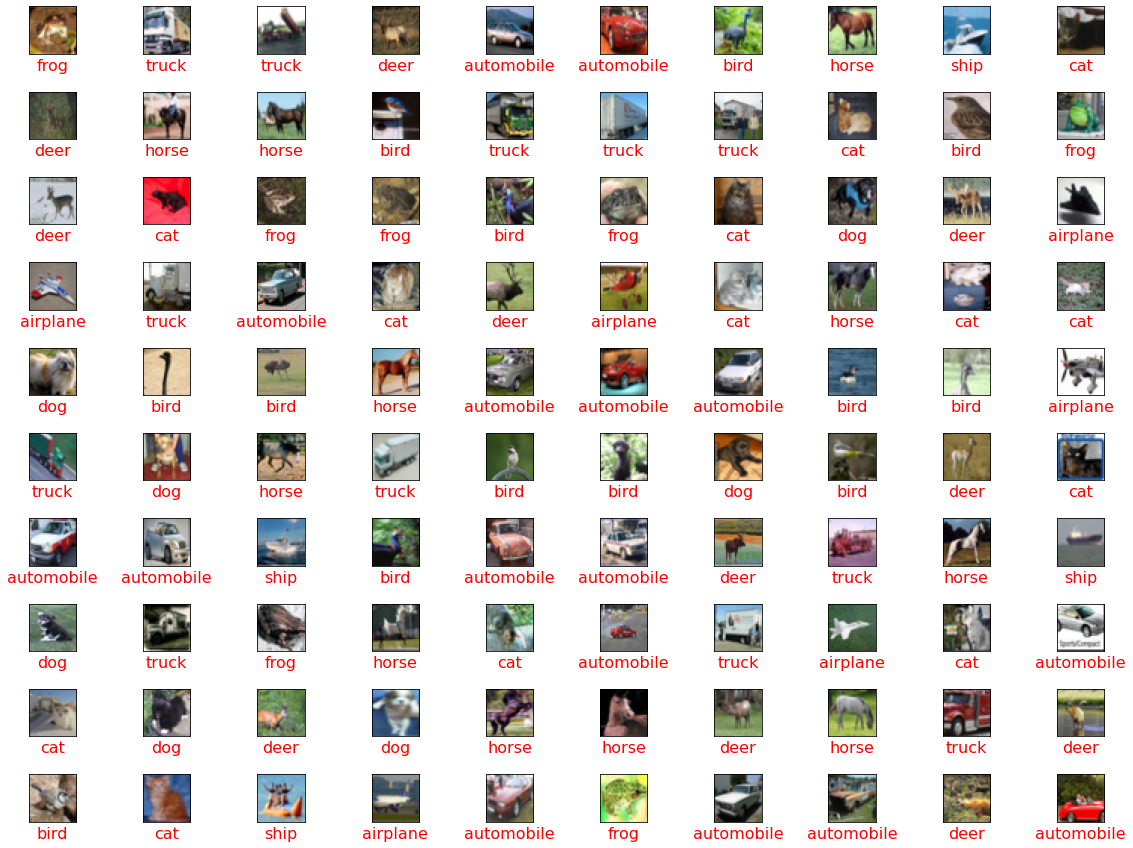

In [4]:
# Visualise a subset of images
import matplotlib.pyplot as plt
labelNames=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_cifar_images(images,class_label):
    fig,axes=plt.subplots(10,10,figsize=(20,15))
    fig.subplots_adjust(hspace=0.8,wspace=0.3)
    
    for i,ax in enumerate(axes.flat):
        ax.imshow(Xtrain[i])
        xlab=labelNames[int(y_int[i])]
        ax.set_xlabel(xlab,fontsize=16)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.xaxis.label.set_color('red')
        
#Visualize the training images       
images=Xtrain[0:100]
cls=ytrain[0:100]
# Visualize the subset of 10 labels of ytrain
print(ytrain[0:10])
y_int = np.argmax(cls, axis=1)
#print('np.argmax(cls, axis=1): {0}'.format(np.argmax(cls, axis=1)))
plot_cifar_images(images,y_int)
    

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 209s 4ms/sample - loss: 1.5140 - acc: 0.4517 - val_loss: 1.1699 - val_acc: 0.5834
Epoch 2/10
50000/50000 [==============================] - 201s 4ms/sample - loss: 1.1113 - acc: 0.6034 - val_loss: 0.9817 - val_acc: 0.6514
Epoch 3/10
50000/50000 [==============================] - 192s 4ms/sample - loss: 0.9391 - acc: 0.6681 - val_loss: 0.9021 - val_acc: 0.6850
Epoch 4/10
50000/50000 [==============================] - 206s 4ms/sample - loss: 0.8195 - acc: 0.7110 - val_loss: 0.8566 - val_acc: 0.7011
Epoch 5/10
50000/50000 [==============================] - 213s 4ms/sample - loss: 0.7286 - acc: 0.7441 - val_loss: 0.8313 - val_acc: 0.7104
Epoch 6/10
50000/50000 [==============================] - 195s 4ms/sample - loss: 0.6567 - acc: 0.7679 - val_loss: 0.8311 - val_acc: 0.7136
Epoch 7/10
50000/50000 [==============================] -

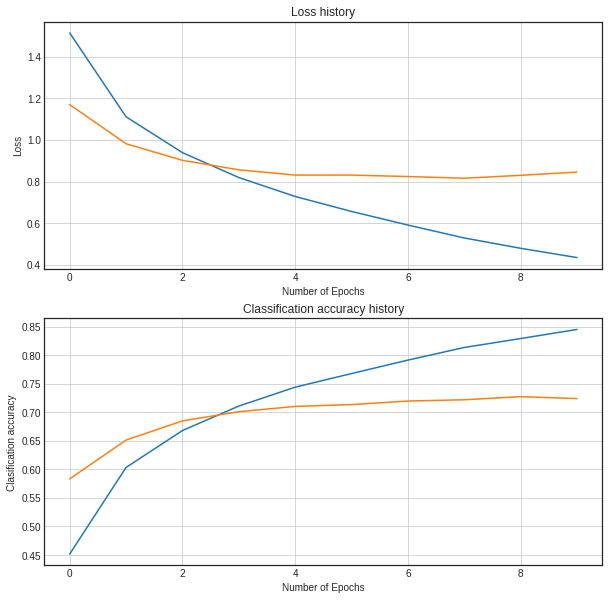

In [5]:

#
# # initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 10, momentum=0.9, nesterov=True)
#opt = adam(lr=0.001, decay=0.01/10)
model = ShallowCNet.build(width=32, height=32, depth=3, classes=10,weights_path=None)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
nb_epoch=10
no_epochs=nb_epoch

# train the network
print("[INFO] training network...")
H = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), batch_size=64, epochs=no_epochs,verbose=1)

weights_dir = '/content/gdrive/MyDrive/Colab Notebooks/CIFAR_weights'

if not os.path.exists(weights_dir):
    os.mkdir(weights_dir)

# save model
model.save_weights(os.path.join(weights_dir, 'cifar_bn_01_weights.h5'))

import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, no_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_epochs), H.history["val_loss"], label="val_loss")
plt.title('Loss history')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(0, no_epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_epochs), H.history["val_acc"], label="val_acc")
plt.title('Classification accuracy history')
plt.xlabel('Number of Epochs')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.savefig(os.path.join(weights_dir, 'cifar_bn_model_plot.png'), dpi=300)
